In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("C:\\Users\\Ketan Gangal\\OneDrive\\Desktop\\python_basic\\Ml\\00 ml_course\\08-Linear-Regression-Models\\Advertising.csv")

In [60]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Normal Linear Regression**
- Step 1 : We clean the Data
- Step 2 : We organize the data
- step 3 : We do data visualization to det insight
- step 4 : we split the data into feature and label
- step 5 : we do train test split
- step 6 : we create instance of model fit and predict
- step 7 : Performance Evaluation 
- step 8 : adjust and deploy 

**Polynomial Regression**

- Step 1 : We clean the Data
- Step 2 : We organize the data
- step 3 : We do data visualization to det insight
- step 4 : we split the data into feature and label
- we use preprosessing lib of sklearn to make higher order term and interection
- That itself contains Fit And Transform 
- step 5 : we do train test split
- step 6 : we create instance of model fit and predict
- Bias and Variance Tradeoff check (Overfitting and Underfitting)
- Plot the degree vs error graph
- choose sutiable degree 
- set final hyper parameter 
- Regularization 
- step 7 : Performance Evaluation 
- Final Train 
- step 8 : adjust and deploy 




In [4]:
X = df.drop(columns='sales')

In [5]:
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [8]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
polynomial_feartures = polynomial_converter.transform(X)

In [10]:
polynomial_feartures.shape

(200, 9)

In [11]:
X.shape

(200, 3)

In [12]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [13]:
# We have save this polynominal_converter 
# because in futurer we have to convert our new data in order to check

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train ,X_test , y_train, y_test = train_test_split(polynomial_feartures,y,test_size=0.30, random_state=101)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train,y_train)

LinearRegression()

In [19]:
test_predictions = model.predict(X_test)

In [20]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [22]:
MAE = mean_absolute_error(y_test,test_predictions)

In [23]:
MSE = mean_squared_error(y_test,test_predictions)

In [24]:
RMSE = np.sqrt(MSE)

In [25]:
MAE,MSE,RMSE

(0.4896798044803811, 0.4417505510403745, 0.6646431757269268)

In [26]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [27]:
polynomial_feartures[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [28]:
# STEPS FOR BIAS VARIENCE TRADE-OFF
# 1. create different order polynomial
# 2. split poly features train and test
# 3. train model and predict error
# 4. store error for both train and test set

In [29]:
train_rmse_error = []
test_rmse_error = []

for d in range(1,10):
    
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    
    polynomial_feartures = polynomial_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(polynomial_feartures,y,test_size=0.30, random_state=101)
    
    model = LinearRegression()
    
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred  = model.predict(X_test)
    
    train_rmse_error.append(np.sqrt(mean_squared_error(y_train,train_pred)))
    
    test_rmse_error.append(np.sqrt(mean_squared_error(y_test,test_pred)))


In [30]:
train_rmse_error

[1.7345941243293763,
 0.587957408529223,
 0.43393443569020673,
 0.3517083688399342,
 0.2509342947031756,
 0.19704459846550335,
 5.421420485986226,
 0.14180598547601236,
 0.16654227322955148]

In [31]:
test_rmse_error

[1.5161519375993877,
 0.6646431757269268,
 0.5803286825165035,
 0.5077742649213955,
 2.575831166466207,
 4.492699702511413,
 1381.4044216899786,
 4449.599748615501,
 95891.24543526075]

Text(0, 0.5, 'Error')

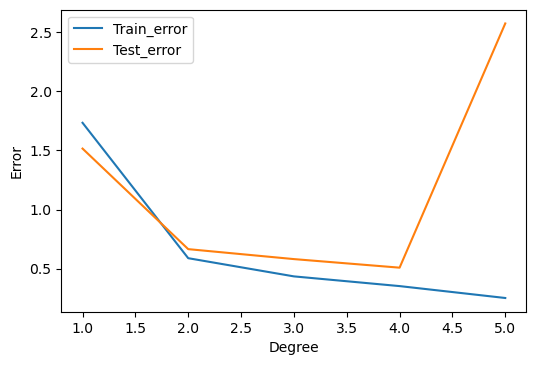

In [32]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(1,6),train_rmse_error[:5],label='Train_error')
plt.plot(range(1,6),test_rmse_error[:5],label='Test_error')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Error')

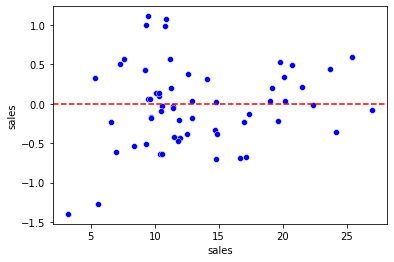

In [56]:
# Residual test purpose 
polynomial_converter = PolynomialFeatures(degree=4,include_bias=False)
polynomial_converter.fit(X)
polynomial_feartures = polynomial_converter.transform(X)

X_train, X_test, y_train, y_test = train_test_split(polynomial_feartures,y,test_size=0.30, random_state=101)
    

model = LinearRegression()
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)

sns.scatterplot(data=df,x=y_test,y=y_test-test_predictions,color='b')
plt.axhline(y=0,ls='--',color = 'r')


<AxesSubplot:xlabel='sales', ylabel='Density'>

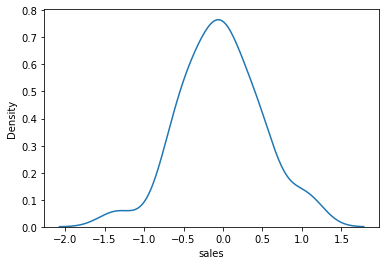

In [57]:
# residual test purpose
sns.kdeplot(data=df,x=y_test-test_predictions)

In [58]:
from joblib import dump,load

In [89]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [90]:
converted_data = polynomial_converter.fit_transform(X)

In [91]:
final_poly_model = LinearRegression()

In [92]:
final_poly_model.fit(converted_data,y)

LinearRegression()

In [93]:
dump(final_poly_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [94]:
dump(polynomial_converter,'poly_converter.joblib')

['poly_converter.joblib']

In [95]:
loaded_model = load('final_poly_model.joblib')

In [96]:
loaded_converter = load('poly_converter.joblib')

In [99]:
loaded_model.predict(loaded_converter.fit_transform([[400,140,0]]))

array([85.90078649])